In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [154]:
import tensorflow
from tensorflow import keras
#import tensorflow.keras as kr
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
sns.set(style='white',context='notebook',palette='deep')

In [155]:
#Load the data

train = pd.read_csv('/Users/abhayranjan/python-scripts/deep-learning/cnn/digit-recognizer/train.csv')
train.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
test = pd.read_csv('/Users/abhayranjan/python-scripts/deep-learning/cnn/digit-recognizer/test.csv')
test.head(n=5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

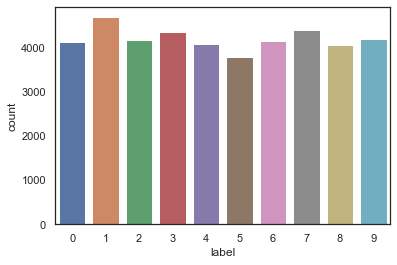

In [158]:
g = sns.countplot(train['label'])

In [159]:
#Check the data
y_train = train['label']
#y_train.isnull().any().describe()
X_train = train.drop(labels=['label'],axis=1)
#X_train.isnull().any().describe()

In [160]:
y_train.isnull().any()

False

In [161]:
print(len(X_train))
print(len(test))

42000
28000


In [162]:
#Normalize the data
#We perform a grayscale normalization to reduce the effect of illumination's differences.
#Moreover the CNN converg faster on [0..1] data than on [0..255]
X_train = X_train/255.0
test = test/255.0

In [163]:
X_train.head(n=5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
#Reshape image in 3 dimensions ( height=28px,width=28px,canal=1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [165]:
#Label Encoding
y_train = to_categorical(y_train,num_classes=10)

In [166]:
#Split the training and validation set for fitting
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=2)

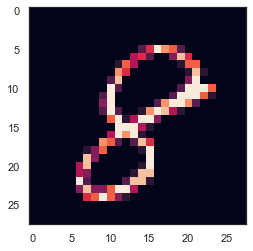

In [167]:
g = plt.imshow(X_train[0][:,:,0])

In [168]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [169]:
#Define the optimizer
optimizer = RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08)

In [170]:
#Compile the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [171]:
#Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [172]:
epochs=30
batch_size=86

In [173]:
#Data Augmentation
datagen = ImageDataGenerator(featurewise_center=False,#set input mean to zero over the dataset
                             samplewise_center=False,#set each sample mean to 0
                             featurewise_std_normalization=False,#divide inputs by std of dataset
                             samplewise_std_normalization=False,#divide each input by its std
                             zca_whitening=False,#apply zca whitening
                             rotation_range=10,#randomly rotate images in the range
                             width_shift_range=0.1,#randomly shift images horizontally(fraction of total width)
                             height_shift_range=0.1,#randomly shift images vertically(fraction of total height)
                             horizontal_flip=False,#randomly flip images
                             vertical_flip=False)
datagen.fit(X_train)

In [174]:
#Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),epochs=epochs,validation_data=(X_val,y_val),verbose=2,steps_per_epoch=X_train.shape[0]//batch_size,callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 145s - loss: 0.4287 - accuracy: 0.8604 - val_loss: 0.0735 - val_accuracy: 0.9788
Epoch 2/30
439/439 - 139s - loss: 0.1243 - accuracy: 0.9624 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 3/30
439/439 - 140s - loss: 0.0914 - accuracy: 0.9727 - val_loss: 0.0384 - val_accuracy: 0.9874
Epoch 4/30
439/439 - 140s - loss: 0.0802 - accuracy: 0.9766 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 5/30
439/439 - 141s - loss: 0.0714 - accuracy: 0.9789 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 6/30
439/439 - 144s - loss: 0.0623 - accuracy: 0.9807 - val_loss: 0.0241 - val_accuracy: 0.9943
Epoch 7/30
439/439 - 146s - loss: 0.0617 - accuracy: 0.9830 - val_loss: 0.0417 - val_accuracy: 0.9905
Epoch 8/30
439/439 - 150s - loss: 0.0593 - accuracy: 0.9832 - val_loss: 0.0248 - val_accuracy: 0.9910
Epoch 9/30
439/439 - 151s - loss: 0.0580 - accuracy: 0.9834 - val_loss: 0.0220 - val_accuracy: 0.9945
Epoch 10/30
439/439 - 155s - loss: 0.0546 - accuracy: 0.9847 - val_loss: 0.0233 - 

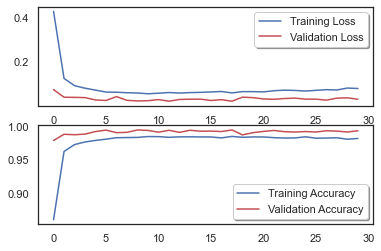

In [175]:
#Evaluate the model
#Plot the loss and accuracy curves for training nd validation
fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label="Validation Loss",axes=ax[0])
legend = ax[0].legend(loc="best",shadow=True)
ax[1].plot(history.history['accuracy'],color='b',label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'],color='r',label="Validation Accuracy")
legend = ax[1].legend(loc="best",shadow=True)

**********
10
10
$$$$$$$$$$$$$


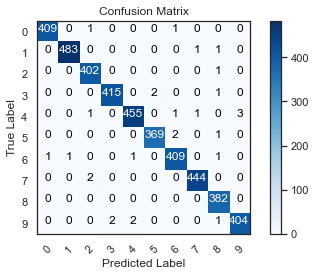

In [180]:
#Look at the confusion matrix.This function prints and plots the confusion matrix

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    print("**********")
    print(cm.shape[0])
    print(cm.shape[1])
    print("$$$$$$$$$$$$$")
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
#Predict the values from validation dataset
y_pred = model.predict(X_val)
#Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis=1)
#Convert validation observation to one hot encoders
y_true = np.argmax(y_val,axis=1)
#Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true,y_pred_classes)
#Plot confusion matrix
plot_confusion_matrix(confusion_mtx,classes=range(10))

In [191]:
#To see the most important errors
#Errors are the difference between predicted an true labels
errors = (y_pred_classes - y_true!=0)
print(errors)
y_pred_classes_errors = y_pred_classes[erros]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

[False False False ... False False  True]


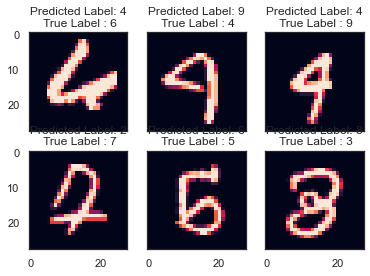

In [193]:
#This function shows 6 images with their predicted and real labels
def display_errors(errors_index,img_errors,pred_errors,obs_errors):
    n=0
    nrows=2
    ncols=3
    fig,ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted Label: {}\n True Label : {}".format(pred_errors[error],obs_errors[error]))
            n+=1
#Probabilities of the wrong oredicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis=1)
#Predicted Probabilities of the true value in the dataset
true_prob_errors = np.diagonal(np.take(y_pred_errors,y_true_errors,axis=1))
#Difference between probabilities of predicted label and true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors
#Sorted List of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)
#Top 6 errors
most_important_errors = sorted_delta_errors[-6:]
#Show the Top 6 errors
display_errors(most_important_errors,X_val_errors,y_pred_classes_errors,y_true_errors)    